In [66]:
# 机器学习中两种问题

回归

* 给定训练样本集$\{(\mathbf{x_1,y_1}),\dots,(\mathbf{x_N,y_N})\},\mathbf{x_i}∈\mathbb{R}^d$
* 回归：预测的是连续值

分类

* 给定训练样本集$\{(\mathbf{x_1,y_1}),\dots,(\mathbf{x_N,y_N})\},\mathbf{x_i}∈\mathbb{R}^d$
* 分类：预测的是离散值
* 典型的二分类：$y_i∈\{-1,+1\}$

In [67]:
# SVM设计之初是用于解决分了问题的，而后来又演化出了回归问题的解决SVD

In [68]:
# SVM建模

线性分类器和最优线性分类器

* 样本空间中，切分超平面
$$\mathbf{w^Tx}+b=0$$
* $\mathbf{w}$是法向量，$b$偏移 而$\mathbf{w}^T$是斜率

In [69]:
# 说明切分二分类样本的超平面很明显有无数多个，我们需要找到最佳位置的超平面使得最大化点到超平面的最短距离，最大化是使得模型具有泛化能力，
# 最小距离是到超平面距离最短的样本点，如果它都能够被分开，那其它点也就能被分开，确保样本点能够被分开

点到超平面的距离

* 超平面 $H = \mathbf{w^Tx}+b=0$
* 空间中任意一点$\mathbf{p}$到平面的距离为
$$r=\frac{|\mathbf{w^Tp}+b|}{\|\mathbf{w}\|_2}$$

    * 推导点$\mathbf{p}$到超平面的距离：
    * 设点$\mathbf{p}^*$为点$\mathbf{p}$在超平面$H$上投影，由此得向量$\overrightarrow{\mathbf{p}-\mathbf{p}^*} \perp H$，
因$\mathbf{w}$是法向量，设向量$\overrightarrow{\mathbf{p}-\mathbf{p}^*}$，即向量$\overrightarrow{r}$点到平面的距离对应的向量为$α\overrightarrow{\mathbf{w}}$，$α$为常数，继而得到$\overrightarrow{\mathbf{p}-\mathbf{p}^*} = α\overrightarrow{\mathbf{w}}$，等式两边同时乘以$\mathbf{w^T}$，得到$\mathbf{w^Tp}-\mathbf{w^Tp^*}=α\|\overrightarrow{\mathbf{w}}\|_2^2$，而$\mathbf{p}^*$是超平面$H$上的点，有$\mathbf{w^Tp^*}+b=0$，得到$\mathbf{w^Tp^*}=-b$，带入公式中，得到$\mathbf{w^Tp}+b=α\|\overrightarrow{\mathbf{w}}\|_2^2$，继而得到$α=\frac{\mathbf{w^Tp}+b}{\|\mathbf{w}\|_2^2}$，而点到平面的距离$\|\overrightarrow{r}\|=α\|\overrightarrow{\mathbf{w}}\|=\frac{\mathbf{w^Tp}+b}{\|\mathbf{w}\|_2^2}\|\overrightarrow{\mathbf{w}}\|=\frac{\mathbf{w^Tp}+b}{\|\mathbf{w}\|_2}$

SVM目标函数

* 几何间隔：

$$M=\min_{i}r_i=\min_{i}\frac{|\mathbf{w^Tx_i}+b|}{\|\mathbf{w}\|_2}$$

* SVM目标函数

$$\max_{\mathbf{w},b}M$$

$$\max_{\mathbf{w},b}\left\{\min_i\frac{|\mathbf{w^Tx_i}+b|}{\|\mathbf{w}\|_2}\right\}$$

In [70]:
# SVM目标函数：找最大化最短距离的样本点，也就是支持向量点

简化目标函数

1、分子部分$|\mathbf{w^Tx_i}+b|$改写为

$$y_i(\mathbf{w^Tx_i}+b)$$

2、目标函数由$\max_{\mathbf{w},b}\left\{\min_i\frac{|\mathbf{w^Tx_i}+b|}{\|\mathbf{w}\|_2}\right\}$变为

$$\max_{\mathbf{w},b}\left\{\min_i\frac{y_i(\mathbf{w^Tx_i}+b)}{\|\mathbf{w}\|_2}\right\}$$

$$\max_{\mathbf{w},b}\left\{\frac{1}{\|\mathbf{w}\|_2}\min_iy_i(\mathbf{w^Tx_i}+b)\right\}$$

In [71]:
# 说明：为什么要将|wTxi+b|改写为yi(wTxi+b)？
# 函数中有绝对值不方便求导，并且yi(wTxi+b)也能够很好地表示|wTxi+b|

Rescaling

* 目标函数

$$\max_{\mathbf{w},b}\left\{\frac{1}{\|\mathbf{w}\|_2}\min_iy_i(\mathbf{w^Tx_i}+b)\right\}$$

* 几何间隔同比例伸缩k倍，$\mathbf{w} \to k\mathbf{w}$和$b \to kb$，点到超平面距离不变

* 因此可以设计距离最近的一个点，使得

$$y_i(\mathbf{w^Tx_i}+b)=1$$

* 同时有

$$y_i(\mathbf{w^Tx_i}+b) \ge 1, i=1,2,\dots,N$$

In [72]:
# 说明：这边为什么使用了几何间隔，而未使用函数间隔？
# 函数间隔不好实现这边的同比例伸缩
# 目标函数里min_iyi(w^Txi+b)是肯定存在某些点到超平面的距离都一样，这些点也恰好
# 在超平面两边的几何间隔上，并且要求是尽量距离最短，那就可以设计这样的点，使得yi(wTxi+b)=1，那其它点必定满足yi(wTxi+b)>=1，因此目标函数
# 可以进一步转化为带约束条件的凸优化问题

简化SVM目标函数

* SVM基本型

$$\begin{align*}
    \min\hspace{0.3cm}&\frac{1}{2}\|\mathbf{w}\|_2^2 \\
    subject\hspace{0.1cm}to\hspace{0.3cm}&y_i(\mathbf{w^Tx_i}+b) \ge 1, i=1,2,\dots,N
\end{align*}$$

* 几何解释

    * 超平面：$\mathbf{w^Tx}+b=0$
    * 正样本间隔超平面：$\mathbf{w^Tx}+b=1$
    * 负样本间隔超平面：$\mathbf{w^Tx}+b=-1$
    * 硬间隔距离：$ρ=\frac{2}{\|\mathbf{w}\|_2}$

In [ ]:
# 这个目标函数是可以转化为标准的二次QP问题的，QP问题是一个凸优化问题

In [73]:
# SVM求解

QP问题

* QP标准型

$$\begin{align*}
    minimize\hspace{0.2cm}&\frac{1}{2}\mathbf{x^TPx} + \mathbf{c^Tx} + d \\
    subject\hspace{0.2cm}to\hspace{0.2cm}&\mathbf{Gx} \le \mathbf{h} \\
    & \mathbf{Ax} = \mathbf{b}
\end{align*}$$

* QP问题

$$\begin{align*}
    minimize\hspace{0.3cm}&\frac{1}{2}\|\mathbf{w}\|_2^2 + C\sum_{i=1}^Nξ_i\\
    subject\hspace{0.1cm}to\hspace{0.3cm}&y_i(\mathbf{w^Tx_i}+b) \ge 1-ξ_i, i=1,2,\dots,N \\
    &ξ_i \ge 0
\end{align*}$$

转成标准型

* 定义

$$\mathbf{x}∈\mathbb{R}^k = 
\begin{bmatrix}
    \mathbf{w} \\
    \mathbf{ξ} \\
    b
\end{bmatrix}$$

* 定义

$$\mathbf{P}∈\mathbb{R}^{k \times k} =
\begin{bmatrix}
    \mathbf{I} & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}，\mathbf{c}∈\mathbb{R}^k = 
\begin{bmatrix}
    0 \\
    C\cdot\mathbf{1} \\
    0
\end{bmatrix}$$

$$\mathbf{G}∈\mathbb{R}^{2N \times k} =
\begin{bmatrix}
    -diag(\mathbf{y})\mathbf{X} & -\mathbf{I} & -\mathbf{y} \\
    0 & -\mathbf{I} & 0
\end{bmatrix}，\mathbf{h}∈\mathbb{R}^{2N} =
\begin{bmatrix}
    -\mathbf{1} \\
    0
\end{bmatrix}$$

###### SVM对偶函数

* Lagrangian函数

$$L(\mathbf{w},b,\mathbf{λ})=\frac{1}{2}\|\mathbf{w}\|_2^2+\sum_{i=1}^Nλ_i(1-y_i(\mathbf{w^Tx_i}+b))$$

* 回忆对偶问题

$$d^*=\max_{\mathbf{λ\ge0}}\left(\min_{\mathbf{w},b}L(\mathbf{w},b,\mathbf{λ})\right)$$

* 令$L(\mathbf{w},b,\mathbf{λ})$对$\mathbf{w}$和$b$的偏导为0，则有$\mathbf{w}=\sum_{i=1}^Nλ_iy_i\mathbf{x}_i$和$\sum_{i=1}^Nλ_iy_i=0$

* 代入则有
$$\begin{align*}
    \max_{\mathbf{λ}}\hspace{0.3cm}&\sum_{i=1}^Nλ_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Nλ_iλ_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j \\
    subject\hspace{0.1cm}to\hspace{0.3cm}&\sum_{i=1}^Nλ_iy_i=0,λ_i \ge 0, i=1,2,\dots,N
\end{align*}$$

> 说明：为什么这边要使用其对偶函数先对$\mathbf{w},b$求导，很明显如果是原问题，先对$\lambda_i$求导，而$\lambda$是每个样本都有一个不同的值，要分别对每个$\lambda$求导，显然是非常复杂的情况，所以写成对偶函数求导要简便的多，而且逻辑上也清楚。

In [74]:
# 说明：上式推导中涉及到的b项，因∑Ni=1λiyi=0而被化简掉
# 说明：i=1,2,...,N是训练集中的前一个样本点，j=1,2,...,N是训练集中的后一个样本点
# 梯度为0求得的w*应该是在第i个数据下得到的最佳w*，而将其代入式子中应该有另一数据对应的最佳w*
# 每个数据都会对应有相应的λ

KKT

* 假定能够解出$λ^*$，强对偶，根据KKT有

    * $y_i(\mathbf{w^Tx_i}+b) \ge 1$
    * $λ_i^* \ge 0$
    * $λ_i^*(y_i(\mathbf{w^{*T}x_i}+b^*)-1)=0$
    * $\mathbf{w}^*=\sum_{i=1}^Nλ_i^*y_i\mathbf{x}_i$，$\sum_{i=1}^Nλ_i^*y_i=0$
    
* 解释

    * 若$λ_j^* = 0$，对$\mathbf{w}^*$毫无贡献
    * 若$λ_j^* > 0$，则$y_j(\mathbf{w^Tx_j}+b) = 1$
    * $\mathbf{w}^*=\sum_{i=1}^Nλ_i^*y_i\mathbf{x}_i$ 代入 $y_j(\mathbf{w^Tx_j}+b) = 1$，则$b^* = y_j - \sum_{i=1}^Nλ_i^*y_i(\mathbf{x_i}^T\mathbf{x_j})$

In [75]:
# 说明：求解λ*单纯在数据量比较小的情况，使用梯度法求解还可以，若大样本集，需要使用SMO算法-坐标上升法求解
# SMO算法本质上是借助了EM算法的思想，对隐变量的求解采用最大似然估计来求得
# 说明：λ分两种情况讨论，λ=0和λ>0，λ=0的点是yi(w^Txi+b)>1，也就是被正确分类的点；而λ>0，是yi(w^Txi+b)=1，也就是支持向量点
# 如果λ和yi(w^Txi+b)-1同时为0，再根据超平面∑i=1Nλ∗iyixix+b∗=0，可得出yj=0的情况，因yj只能是正负1，出现矛盾
# λ∗i(yi(w∗Txi+b∗)−1)=0这个条件是根据强对偶推得

SVM最终步骤

* 最优分离超平面

$$\mathbf{w}^{*T}\mathbf{x}+b^*=0$$
$$\sum_{i=1}^Nλ_i^*y_i\mathbf{x}_i\mathbf{x}+b^*=0$$

* 决策函数

$$f(\mathbf{x})=sign\left(\sum_{i=1}^Nλ_i^*y_i\mathbf{x}_i\mathbf{x}+b^*\right)$$

In [76]:
# 说明：根据符号函数可以看出，在对新样本进行分类决策时，只要在求得最优λ和b后，灌进函数即可
# 同时也可以看出，实际上老样本和新样本的内积运算 感觉也是挺妙的
# 很多时候计算出来的公式，具有一定的规律性，让人感觉很神奇

In [77]:
# SMO算法求解λ*

思想

* 求解下列无约束优化问题
$$\max_{\mathbf{λ}}W(λ_1,λ_2,\dots,λ_m)$$

* 除了之前谈到的算法，还可以考虑这样解：例如固定$λ_2,\dots,λ_m$，求解$λ_1$，反复迭代

* 在SVM中不能只留一个变量，因$\sum_{i=1}^Nλ_i^*y_i=0$。
    
    * 选取一对需要更新的变量$λ_i$和$λ_j$
    * 固定其它参数，求解SVM对偶式，得$λ_i$和$λ_j$
    * 每次求解是关于$λ_i$的单变量QP问题，仅有的约束是$λ_i \ge 0$，一维搜索问题

In [78]:
# SVM扩展

软间隔

$$\begin{align*}
    minimize\hspace{0.3cm}&\frac{1}{2}\|\mathbf{w}\|_2^2 + C\sum_{i=1}^Nξ_i\\
    subject\hspace{0.1cm}to\hspace{0.3cm}&y_i(\mathbf{w^Tx_i}+b) \ge 1-ξ_i, i=1,2,\dots,N \\
    &ξ_i \ge 0
\end{align*}$$

In [79]:
# 说明：定义软间隔是对在间隔内的点和误分类点的容错考虑
# 加入了软间隔也只是对λ的约束条件进行了进一步限制，从λ>=0变成0<=λ<C
# 讨论范围就变成了ξ>1分类正确的点，0<ξ<1在间隔内的点，ξ=1为支持向量点，ξ=0在划分超平面上的点，ξ<0则是误分类的点
# 通过这种方式能够表示所有可能的点

核函数

思想

* 线性不可分时？
* 特征映射$\mathbf{x} \mapsto \phi(\mathbf{x})$
* SVM目标函数

$$\begin{align*}
    \min\hspace{0.3cm}&\frac{1}{2}\|\mathbf{w}\|_2^2 \\
    subject\hspace{0.1cm}to\hspace{0.3cm}&y_i(\mathbf{w^T\phi(\mathbf{x}_i)}+b) \ge 1, i=1,2,\dots,N
\end{align*}$$

In [80]:
# 说明：有很多情况下，在低维很难或者不好划分时，可以考虑将其映射到高维进行划分
# 而映射到高维后，带来了计算量的增加，由此又引入了核函数，就是在原始维度进行计算，其结果与高维计算结果等效
# 比如说在原始维度线性不可分的情况，或者很难划分的情况，我们的xi.xj就会变成高次方项，不可分自然要到高维找映射函数可分的超平面，难分的情况下
# 也是如此，因我们从式子中可知只要求计算两个高次项的内积，所以肯定存在高维空间的映射函数的乘积的结果等同于这个低维空间的内积的结果(都是一个常数)
# 而到了高维，自然引入了多元分量，计算量肯定会大幅度加大，那我们想能不能再回到原始维度，找到这么个函数的结果可以实现在高维计算结果的等效，
# 肯定也是存在的，那就有了核函数，也就是核技巧的运用
# 几类核函数：多项式核函数能够表示任意高次问题，而高斯核函数能够映射到无穷维空间，这些性质也就是说几乎能够表示任意函数的情况
# 而线性核函数则是表示的SVM线性可分的情况
# 高斯核可以映射到无穷维的解释：因高斯核是指数函数，指数函数可以由泰勒级数近似展开到无穷维
# https://www.zhihu.com/question/35602879

核函数

* 特征映射$\mathbf{x} \mapsto \phi(\mathbf{x})$，对偶问题

$$\begin{align*}
    \max_{\mathbf{λ}}\hspace{0.3cm}&\sum_{i=1}^Nλ_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Nλ_iλ_jy_iy_j\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j) \\
    subject\hspace{0.1cm}to\hspace{0.3cm}&\sum_{i=1}^Nλ_iy_i=0,λ_i \ge 0, i=1,2,\dots,N
\end{align*}$$

* 直接计算$\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$很困难，假设有如下函数(核技巧)

$$\kappa(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i)^T\phi(\mathbf{x}_j)$$

* 决策函数

$$f(\mathbf{x})=sign\left(\sum_{i=1}^Nλ_i^*y_i\kappa(\mathbf{x}_i,\mathbf{x})+b^*\right)$$

常用核函数

* 线性核

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=\mathbf{x}_i^T\mathbf{x}_j$$

* 多项式核

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=(\mathbf{x}_i^T\mathbf{x}_j)^d, d \ge 1$$

* 高斯核

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=exp\left(-\frac{\|\mathbf{x_i-x_j}\|^2}{2ρ^2}\right)$$

* 拉普拉斯核

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=exp\left(-\frac{\|\mathbf{x_i-x_j}\|}{ρ}\right)$$

* Sigmod核

$$\kappa(\mathbf{x}_i,\mathbf{x}_j)=tanh\left(β\mathbf{x}_i^T\mathbf{x}_j+θ\right)$$

In [ ]:
# 说明：线性核其实就是SVM线性可分的情况，出现非线性可分时，可能需要采用其它核函数，如多项式核和高斯核，一般高斯核用的比较多

In [81]:
# SVM实例

Text(0.5,1,'decision boundary for a linear SVM classifier with C=0.10')

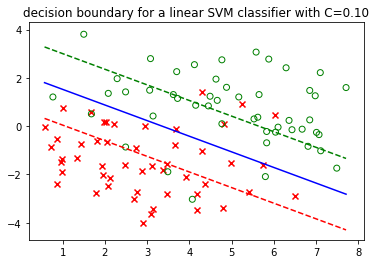

In [1]:
import numpy as np
import pandas as pd
from cvxpy import *
import matplotlib.pyplot as plt
% matplotlib inline

# 导入数据
q1x = pd.read_csv(r"/Users/johnnie/Desktop/q1x.csv",header=None)
q1y = pd.read_csv(r"/Users/johnnie/Desktop/q1y.csv",header=None)


# 定义变量
X = q1x.as_matrix()
y = 2*(q1y.as_matrix()-0.5)
C = 0.1
m = X.shape[0]
n = X.shape[1]

# 使用cvx训练svm
xi = Variable(m)
w = Variable(n)
b = Variable()

constraints = [mul_elemwise(y,X*w+b) >= 1-xi, xi>=0]
obj = Minimize(1/2*square(norm(w)) + C*sum_entries(xi))
prob = Problem(obj, constraints)
prob.solve()
# print (prob.status)
# print (prob.value)
# print (w.value,b.value,xi.value)

# 可视化

xp = np.linspace(q1x[0].min(),q1x[0].max(),100)
w = w.value.getA1() # 使用.getA1()方法将matrix转换为ndarray
b = b.value
yp = -(w[0]*xp+b)/w[1] # 决策边界
yp1 = -(w[0]*xp+b-1)/w[1] # 与输出样本y=1的对应，也就是正样本
yp0 = -(w[0]*xp+b+1)/w[1] # 与输出样本y=0的对应，也就是负样本
idx0 = np.where(q1y==0)
idx1 = np.where(q1y==1)
plt.scatter(q1x[:np.size(idx0[0])][0],q1x[:np.size(idx0[0])][1],c='r',marker='x')
plt.scatter(q1x[99-np.size(idx1[0]):][0],q1x[99-np.size(idx1[0]):][1],facecolors='none',edgecolors='g')
plt.plot(xp,yp,'-b',xp,yp1,'--g',xp,yp0,'--r')
plt.title('decision boundary for a linear SVM classifier with C=%.2f' %C)

# 说明：在画线形图时，遇到matrix和ndarray的问题，图形只能是ndarry格式才能绘制，matrix时及时维数相同也不可以